## Uber Supply Demand Gap case study

### Problem Statement

Uber provides ride hailing services by providing a application platform that connects drivers with cars to people who needs get from point A to point B. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

To  increase its chances to connect both the drivers (the supply part of the service) and the riders (the demand part of the service), Uber needs to work out the gaps where the supply is not meeting the demand and how to fulfill that gap. 

These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.
The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

#### Importing the libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Reading and Cleaning the data

In [375]:
#read the data set of "Uber Request Data" in inp0.
#parsed the datetime columns into the correct format 
inp0=pd.read_csv("Uber Request Data.csv", parse_dates=['Request timestamp', 'Drop timestamp'], dayfirst=True, infer_datetime_format=True)


In [376]:
#Check the dataset info
inp0.info()

# Figured data types and nulls existing in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [377]:
inp0.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [378]:
# Changed data type of Request id to correct type
inp0['Request id']=inp0['Request id'].astype('object')

In [379]:
# Changed data type of Driver id to correct type
inp0['Driver id']=inp0['Driver id'].astype('object')

In [380]:
# Finding out the total null values in the data
inp0.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

1. Null value data in Driver id holds info on the trips 
   that had No Cars Available. Hence, not necessary to do anything. 
2. Null values in Drop timestamp because drop off didn't happen,
   holding info on the trips that were either Cancelled or No Cars 
   Available

In [381]:
# Since Request id are all unique and no information from it, 
# request id column can be dropped
inp0.drop('Request id', axis=1, inplace=True)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Driver id          4095 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 263.6+ KB


In [382]:
# Create new variable of Request Time Of Day with bins based on Request timestamp

timelabel=['Early Morning(0-6)', 'Morning(6-12)', 'Noon(12-17)', 'Evening(17-21)', 'Late Evening(21-24)']
inp0['Request TimeOfDay'] = pd.cut(inp0['Request timestamp'].dt.hour, bins=[0, 6, 12, 17, 21, 24], labels=timelabel, right=True, include_lowest=True)
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Driver id          4095 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
 5   Request TimeOfDay  6745 non-null   category      
dtypes: category(1), datetime64[ns](2), object(3)
memory usage: 270.4+ KB


In [413]:
# Create new variable of trip duration

from datetime import timedelta
inp0['TripDuration_Mins']= round((inp0['Drop timestamp']-inp0['Request timestamp'])/timedelta(minutes=1),0)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Driver id          4095 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
 5   Request TimeOfDay  6745 non-null   category      
 6   TripDuration_Min   2831 non-null   float64       
 7   status_flag        6745 non-null   int64         
 8   TripDuration_Mins  2831 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 428.5+ KB


In [384]:
inp0.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request TimeOfDay,TripDuration_Min
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning(6-12),69.0
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Noon(12-17),50.0
2,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning(6-12),41.0
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Evening(17-21),55.0
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning(6-12),53.0


In [385]:
# Described the data to see any irregularities in the data values
# such as unique values, and frequencies of occuring
inp0.describe(include=['object', 'datetime'])

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745,4095.0,6745,6745,2831
unique,2,300.0,3,5618,2598
top,City,27.0,Trip Completed,2016-07-11 19:02:00,2016-07-11 13:00:00
freq,3507,22.0,2831,6,4
first,NaN,NaN,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00
last,NaN,NaN,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24


### Univariate Analysis

In [433]:
# Calculate the percentage of each status category 
inp0['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

<Axes: ylabel='Status'>

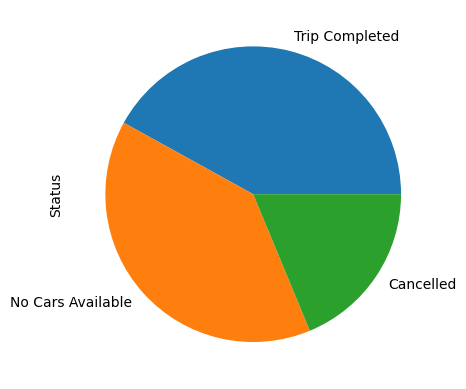

In [387]:
# pot the bar graph of percentage of ride Request TimeOfDay
inp0['Status'].value_counts(normalize=True).plot.pie()

In [388]:
# Calculate the percentage of Request TimeOfDay category 
inp0['Request TimeOfDay'].value_counts(normalize=True)

Evening(17-21)         0.285248
Morning(6-12)          0.275463
Early Morning(0-6)     0.210675
Noon(12-17)            0.154781
Late Evening(21-24)    0.073832
Name: Request TimeOfDay, dtype: float64

<Axes: ylabel='Request TimeOfDay'>

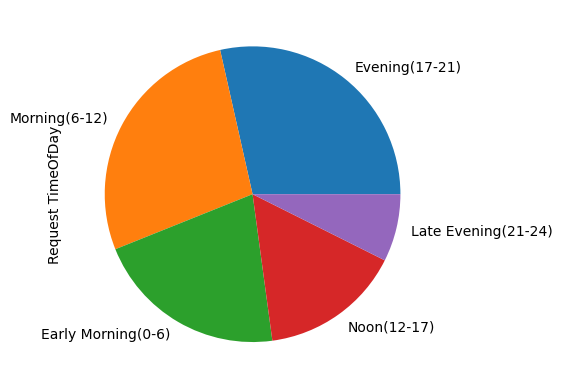

In [389]:
# pot the bar graph of percentage of ride Request TimeOfDay
inp0['Request TimeOfDay'].value_counts(normalize=True).plot.pie()

In [390]:
# Calculate the percentage of pickup point category
inp0['Pickup point'].value_counts(normalize=True)

City       0.519941
Airport    0.480059
Name: Pickup point, dtype: float64

<Axes: ylabel='Pickup point'>

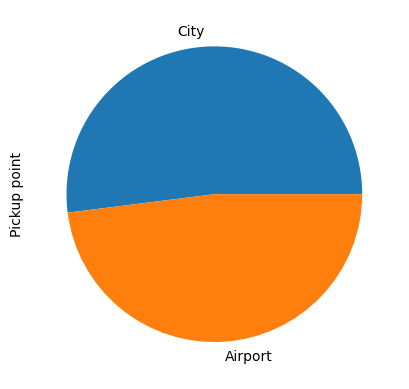

In [414]:
# pot the bar graph of percentage of ride Request TimeOfDay
inp0['Pickup point'].value_counts(normalize=True).plot.pie()

In [437]:
inp0['TripDuration_Mins'].describe()

count    2831.000000
mean       52.413282
std        13.853709
min        21.000000
25%        41.000000
50%        52.000000
75%        64.000000
max        83.000000
Name: TripDuration_Mins, dtype: float64

<Axes: ylabel='TripDuration_Mins'>

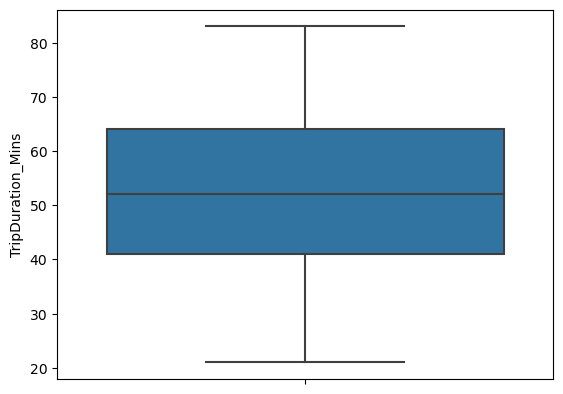

In [418]:
sns.boxplot(data=inp0, y='TripDuration_Mins')

<Axes: >

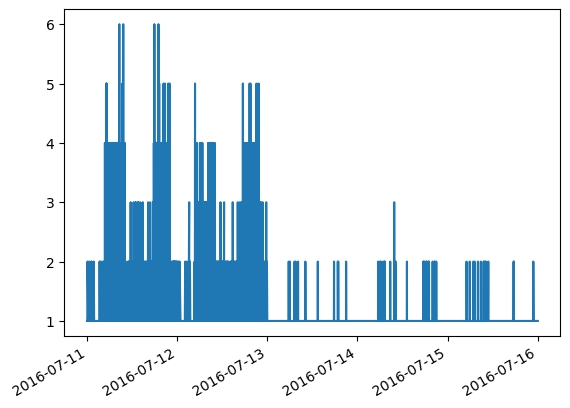

In [392]:
# plot the bar graph of Request timestamp
inp0['Request timestamp'].value_counts().plot()

<Axes: >

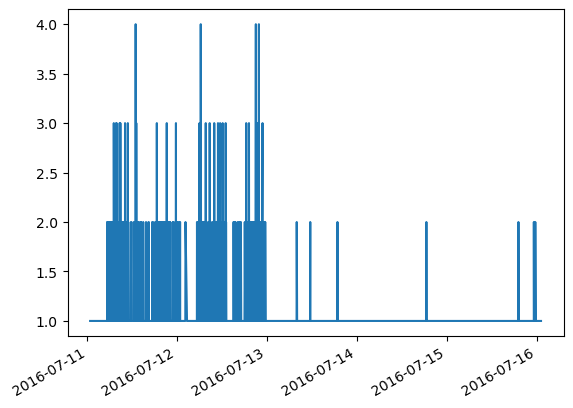

In [393]:
# plot the bar graph of Drop timestamp
inp0['Drop timestamp'].value_counts().plot()

### Bivariate analysis of effects on Trip Status

In [394]:
#create status_flag of numerical data type where response "Trip Completed"= 1, 
# "Cancelled"= 0, and "No Cars Available"=0

inp0['status_flag'] = np.where(inp0.Status=='Trip Completed', 1,0)

In [434]:
inp0.status_flag.value_counts(normalize=True)

0    0.580282
1    0.419718
Name: status_flag, dtype: float64

In [396]:
# groupby the Pickup point to find the mean of Trip completion for each Pickup point
inp0.groupby('Pickup point')['status_flag'].mean()

Pickup point
Airport    0.409821
City       0.428857
Name: status_flag, dtype: float64

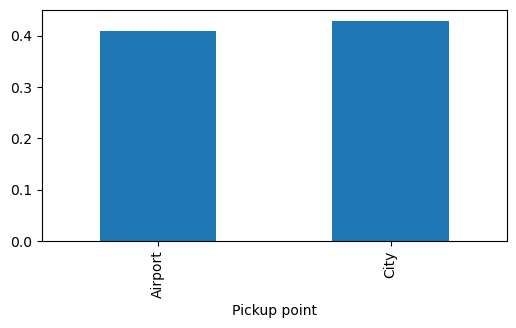

In [450]:
#plot the bar graph of pickup point with average value of trip completion
plt.figure(figsize=[6,3])
inp0.groupby('Pickup point')['status_flag'].mean().plot.bar()
plt.show()

In [443]:
# groupby the Requested TimeofDay to find the mean of Trip completion for each TimeOfDay
inp0.groupby('Request TimeOfDay')['status_flag'].mean()

Request TimeOfDay
Early Morning(0-6)     0.398311
Morning(6-12)          0.459634
Noon(12-17)            0.499042
Evening(17-21)         0.329002
Late Evening(21-24)    0.516064
Name: status_flag, dtype: float64

<Axes: xlabel='Request TimeOfDay'>

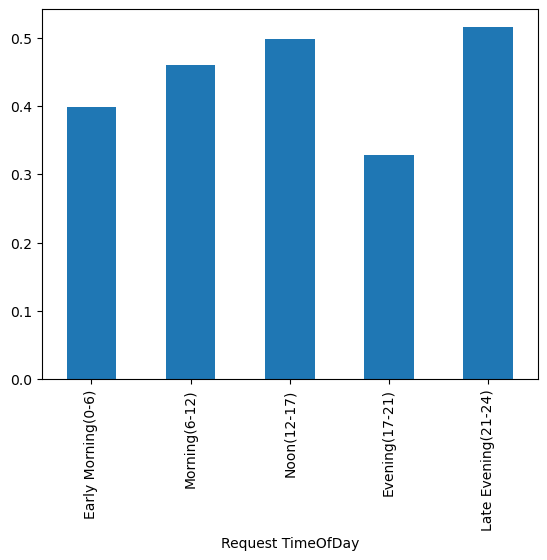

In [399]:
inp0.groupby('Request TimeOfDay')['status_flag'].mean().plot.bar()

In [455]:
inp0[inp0['Status']=='Cancelled']['Pickup point'].value_counts(normalize=True)

City       0.843354
Airport    0.156646
Name: Pickup point, dtype: float64

<Axes: >

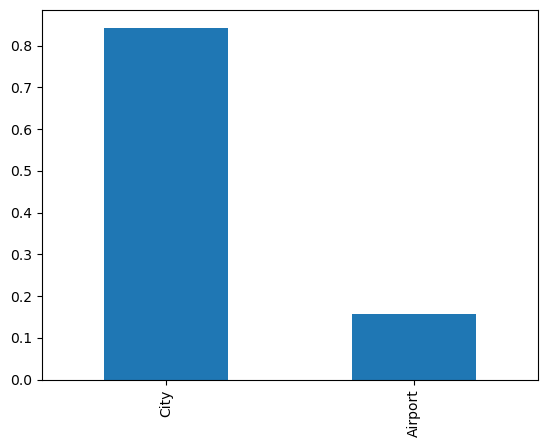

In [456]:
# Of the requests that were cancelled, proportion of pickup point 
inp0[inp0['Status']=='Cancelled']['Pickup point'].value_counts(normalize=True).plot.bar()

In [457]:
# Of the requests that were unsuccessful due to No Cars Available, proportion of pickup point 
inp0[inp0['Status']=='No Cars Available']['Pickup point'].value_counts(normalize=True)

Airport    0.646415
City       0.353585
Name: Pickup point, dtype: float64

<Axes: >

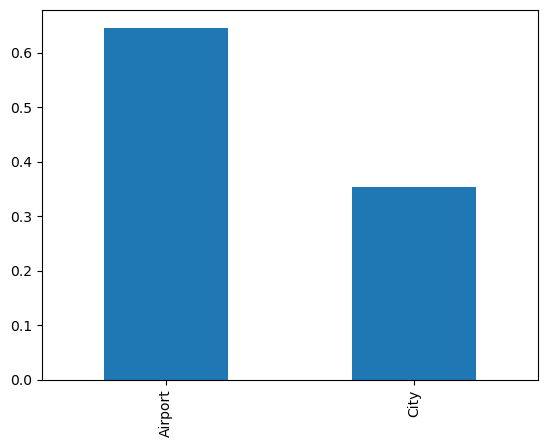

In [458]:
# Of the requests that were unsuccessful due to No Cars Available, proportion of pickup point 
inp0[inp0['Status']=='No Cars Available']['Pickup point'].value_counts(normalize=True).plot.bar()

In [459]:
# Of the requests that were cancelled, proportion of Request TimeOfDay
inp0[inp0['Status']=='Cancelled']['Request TimeOfDay'].value_counts(normalize=True)

Morning(6-12)          0.488924
Early Morning(0-6)     0.305380
Evening(17-21)         0.103639
Noon(12-17)            0.084652
Late Evening(21-24)    0.017405
Name: Request TimeOfDay, dtype: float64

<Axes: >

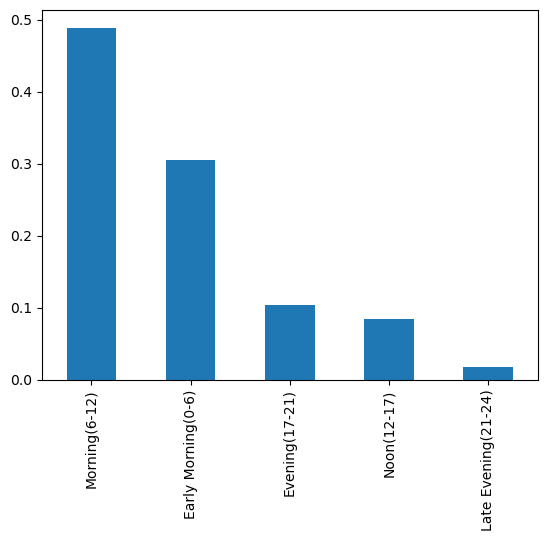

In [460]:
# Of the requests that were cancelled, proportion of Request TimeOfDay
inp0[inp0['Status']=='Cancelled']['Request TimeOfDay'].value_counts(normalize=True).plot.bar()

In [461]:
# Of the requests that were unsuccessful due to No Cars Available, proportion of Request TimeOfDay
inp0[inp0['Status']=='No Cars Available']['Request TimeOfDay'].value_counts(normalize=True)

Evening(17-21)         0.437736
Early Morning(0-6)     0.176981
Noon(12-17)            0.156981
Morning(6-12)          0.145660
Late Evening(21-24)    0.082642
Name: Request TimeOfDay, dtype: float64

<Axes: >

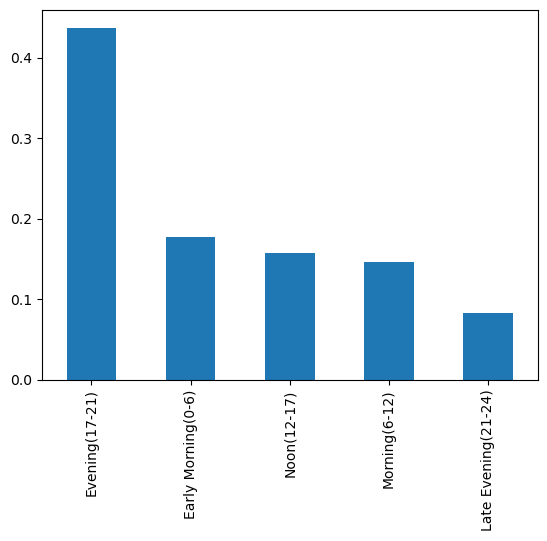

In [431]:
# Of the requests that were unsuccessful due to No Cars Available, proportion of Request TimeOfDay
inp0[inp0['Status']=='No Cars Available']['Request TimeOfDay'].value_counts(normalize=True).plot.bar()

### Multivariate Aanalysis

<Axes: xlabel='Pickup point', ylabel='Request TimeOfDay'>

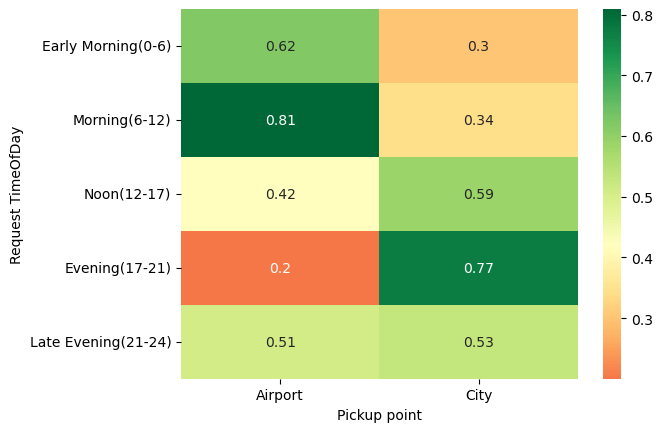

In [438]:
#create heat map of Request TimeOfDay vs Pickup point vs Status_flag
# higher vaulue represents Trips Completed
res=pd.pivot_table(data=inp0, index='Request TimeOfDay', columns='Pickup point', values='status_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.42)

<Axes: xlabel='Pickup point', ylabel='Request TimeOfDay'>

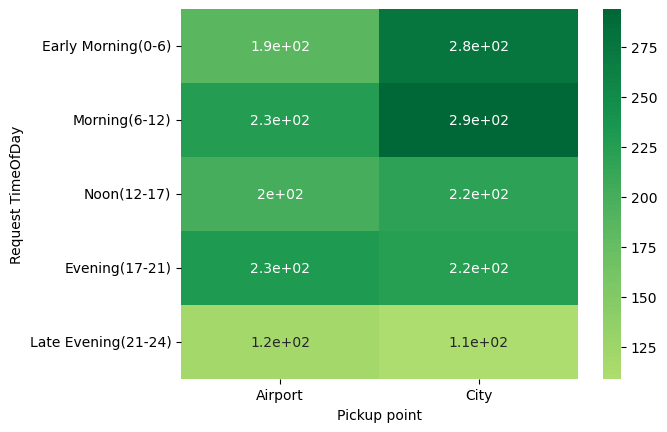

In [442]:
#create heat map of Request TimeOfDay vs Pickup point vs Status_flag
# higher vaulue represents Trips Completed
res=pd.pivot_table(data=inp0, index='Request TimeOfDay', columns='Pickup point', values='Driver id', aggfunc=pd.Series.nunique)
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.42)

### 1. Visually identify the most pressing problems for Uber.

Hint: Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

In [402]:
# Created a separate dataset of missed opportunities that were either cancelled or had no cars available
inp1=inp0[inp0['Drop timestamp'].isnull()]
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 2831 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       3914 non-null   object        
 1   Driver id          1264 non-null   object        
 2   Status             3914 non-null   object        
 3   Request timestamp  3914 non-null   datetime64[ns]
 4   Drop timestamp     0 non-null      datetime64[ns]
 5   Request TimeOfDay  3914 non-null   category      
 6   TripDuration_Min   0 non-null      float64       
 7   status_flag        3914 non-null   int64         
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 248.7+ KB


<Axes: >

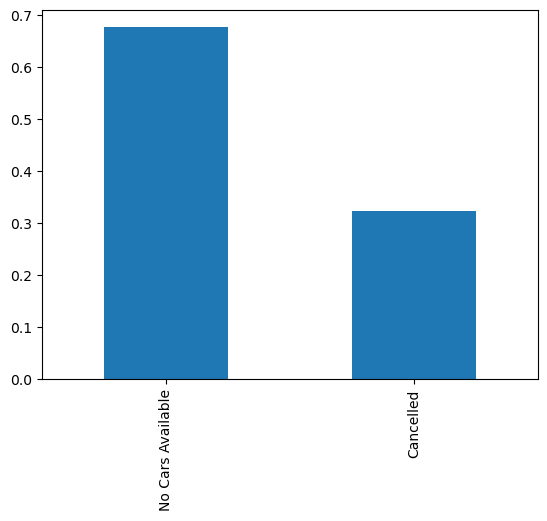

In [423]:
# proportion of missed opportunities
inp1['Status'].value_counts(normalize=True).plot.bar()

<Axes: >

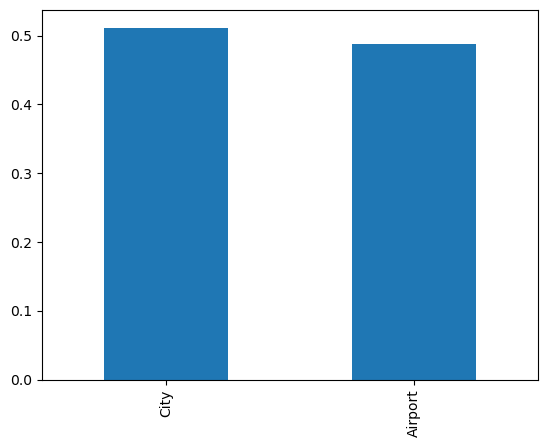

In [404]:
#Of the missed opportunities, the proportion of pickup points
inp1['Pickup point'].value_counts(normalize=True).plot.bar()

<Axes: >

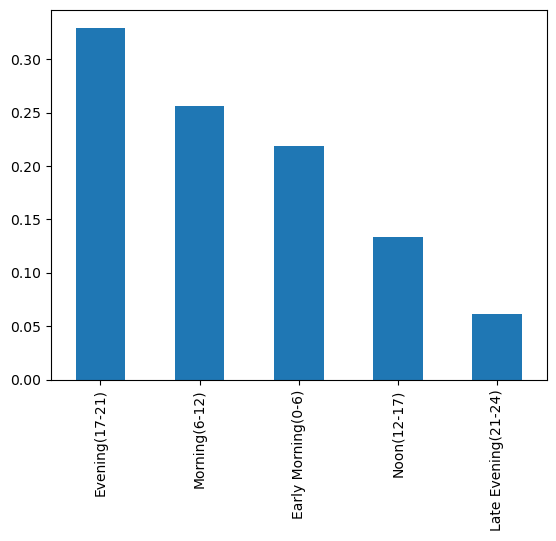

In [432]:
#Of the missed opportunities, the proportion of Request TimeOfDay
inp1['Request TimeOfDay'].value_counts(normalize=True).plot.bar()

In [462]:
#create response_flag of numerical data type where status "No Cars Available"= 1, "Cancelled"= 0
inp1['CarShortage_flag']=np.where(inp1.Status=='No Cars Available',1,0)

In [463]:
inp1['CarShortage_flag'].mean()

0.6770567194685744

<Axes: xlabel='Pickup point', ylabel='Request TimeOfDay'>

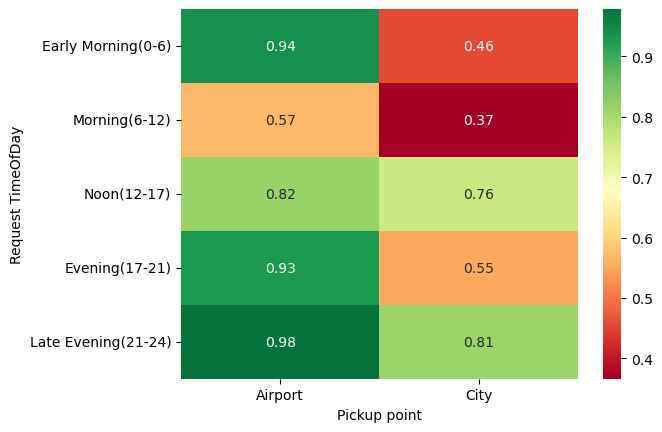

In [465]:
#create heat map of Request TimeOfDay vs Pickup point vs Status_flag
res=pd.pivot_table(data=inp1, index='Request TimeOfDay', columns='Pickup point', values='CarShortage_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.68)